In [1]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
from cleantext import clean
from datetime import datetime

df_nov = pd.read_csv("T:\sem_3\data driven policy\chatgpt_app_updated_nov.csv")

In [2]:
# Sample DataFrame

# Function to clean text using clean-text library
def clean_text(text):
    cleaned_text = clean(text, 
                         fix_unicode=True,               # fix various unicode errors
                         to_ascii=True,                   # transliterate to closest ASCII representation
                         lower=True,                      # convert to lowercase
                         no_line_breaks=True,             # fully strip line breaks
                         no_urls=True,                    # replace all URLs with ''
                         #no_emails=True,                  # replace all email addresses with ''
                         no_phone_numbers=True,           # replace all phone numbers with ''
                         #no_numbers=True,                 # replace all numbers with ''
                         #no_digits=True,                  # replace all digits with ''
                         no_currency_symbols=True,        # replace all currency symbols with ''
                         no_punct=True,                   # remove punctuations
                         replace_with_url="<URL>",
                         #replace_with_email="<EMAIL>",
                         replace_with_phone_number="<PHONE>",
                         #replace_with_number="<NUM>",
                         #replace_with_digit="<DIGIT>",
                         replace_with_currency_symbol="<CUR>"
                        )
    return cleaned_text

# Apply the clean_text function to the 'text_column' of the DataFrame
df_nov['content_clean'] = df_nov['content'].apply(clean_text)

# Print the cleaned DataFrame
print(df_nov)


       appVersion          at  \
0      1.2023.313  2023-11-23   
1      1.2023.314  2023-12-01   
2      1.2023.314  2023-12-04   
3      1.2023.313  2023-11-22   
4      1.2023.314  2023-12-03   
...           ...         ...   
44380         NaN  2023-07-25   
44381         NaN  2023-10-18   
44382         NaN  2023-11-17   
44383         NaN  2023-07-25   
44384         NaN  2023-09-27   

                                                 content repliedAt  \
0      Most useful application ever, by far. Most peo...       NaN   
1      So yeah... Incredible. The base is awesome. Th...       NaN   
2      Great app, works just like the website. I like...       NaN   
3      so far, the new function to be able to speak t...       NaN   
4      Most impressive AI I've experienced. Very much...       NaN   
...                                                  ...       ...   
44380                                           ❤️❤️❤️❤️       NaN   
44381                                      

In [3]:
# Function to get sentiment polarity using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df_nov['sentiment_score'] = df_nov['content_clean'].apply(get_sentiment)

In [4]:
df_nov.sample(5)

,appVersion,at,content,repliedAt,replyContent,reviewCreatedVersion,reviewId,score,thumbsUpCount,userImage,userName,content_clean,sentiment_score
41908,1.0.0016,2023-07-25,Just wow 🙂🖤,NaN,NaN,1.0.0016,44131fbe-cfc1-4a0e-9b7f-d9b6344c62a0,5,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Raihanur Alam,just wow 🙂🖤,0.1
21626,1.2023.242,2023-09-24,this is great app Ilike this app,NaN,NaN,1.2023.242,c58a2f22-d77d-47b5-94fc-5bcdb23d8674,5,0,https://play-lh.googleusercontent.com/a-/ALV-U...,A.semmozhi Dhasan,this is great app ilike this app,0.8
38363,1.0.0035,2023-08-24,Superb,NaN,NaN,1.0.0035,063c62a0-00fc-4f5a-b3e3-1512ee88c261,5,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Emmanuel B. SANGUF,superb,1.0
36920,1.2023.242,2023-09-10,Impressive,NaN,NaN,1.2023.242,583faaa7-bc55-4f8f-b61a-f4c7570f9e63,5,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Louis Johnson-Kelly,impressive,1.0
37143,1.0.0039,2023-09-05,best app,NaN,NaN,1.0.0039,271b01d9-2bb3-458f-8990-43ccdc621075,3,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Atit Chauhan,best app,1.0


In [5]:
df_nov.dropna(subset=['appVersion'], inplace=True)


In [6]:
# Extract versions "1.0" and "1.2023"
df_nov['version_category'] = np.where(df_nov['appVersion'].str.contains('^1\.0'), '0', '2023')
df_nov['version_category'] = df_nov['version_category'].astype(int)

In [7]:
# Convert the 'date_column' to datetime format
df_nov['at'] = pd.to_datetime(df_nov['at'], format='%Y-%m-%d')

# Sort the DataFrame by date
df_nov = df_nov.sort_values(by='at')

In [14]:
# Create separate 'month' and 'day' columns
df_nov['Month'] = df_nov['at'].dt.month_name()
df_nov['Day'] = df_nov['at'].dt.day
df_nov['Year'] = df_nov['at'].dt.year

In [9]:
data_01 = df_nov[(df_nov['version_category'] == 0)]
data_2023 = df_nov[(df_nov['version_category'] == 2023)]


In [10]:
data_2023.sample(2)

,appVersion,at,content,repliedAt,replyContent,reviewCreatedVersion,reviewId,score,thumbsUpCount,userImage,userName,content_clean,sentiment_score,version_category,Month,Day,Year
13743,1.2023.314,2023-12-01,it's pretty awesome,NaN,NaN,1.2023.314,5db8831e-cdae-4e36-9b65-ede2c4982f20,5,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Ravin Kahadagama,its pretty awesome,0.625,2023,December,1,2023
3209,1.2023.314,2023-11-28,Except critical thinking of mathematics and ph...,NaN,NaN,1.2023.314,4aa4d746-e84d-465a-b883-9550031918a5,4,0,https://play-lh.googleusercontent.com/a/ACg8oc...,Arpita Das,except critical thinking of mathematics and ph...,0.000,2023,November,28,2023


In [16]:
data_01

,appVersion,at,content,repliedAt,replyContent,reviewCreatedVersion,reviewId,score,thumbsUpCount,userImage,userName,content_clean,sentiment_score,version_category,Month,Day,Year
42144,1.0.0016,2023-07-25,System.......,NaN,NaN,1.0.0016,e2e9299c-33a3-4667-9dde-fe84bcc89c99,5,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Souvik Das,system,0.000000,0,July,25,2023
12144,1.0.0016,2023-07-25,The website works better on mobile then their ...,NaN,NaN,1.0.0016,9bb7618e-4dc3-4175-a334-e81b70aba826,2,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Rodney Hamm,the website works better on mobile then their ...,0.500000,0,July,25,2023
25124,1.0.0022,2023-07-25,It just works.,NaN,NaN,1.0.0022,6aa44972-388c-4412-a1ea-0bb87a917907,5,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Daniel Aguilar,it just works,0.000000,0,July,25,2023
12131,1.0.0016,2023-07-25,Simple and easy to use. Does it's job.,NaN,NaN,1.0.0016,167467d0-8638-4a51-bf6e-ff8a6fd29eed,5,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Nikhil Dwivedi,simple and easy to use does its job,0.216667,0,July,25,2023
2143,1.0.0016,2023-07-25,I think the app is designed very well and look...,NaN,NaN,1.0.0016,c6a48872-a55b-4dd4-8dee-8710e39f42c9,5,3,https://play-lh.googleusercontent.com/a-/ALV-U...,A,i think the app is designed very well and look...,0.300379,0,July,25,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12721,1.0.0039,2023-12-04,"This has helped me a lot, and I would rate it ...",NaN,NaN,1.0.0039,481a1610-3029-466f-ba97-f734715789d5,5,0,https://play-lh.googleusercontent.com/a/ACg8oc...,Idris Abdulkareem,this has helped me a lot and i would rate it 6...,0.500000,0,December,4,2023
38612,1.0.0032,2023-12-05,"No words, this app is very very useful app for...",NaN,NaN,1.0.0032,bd46657b-75a9-4119-a38d-a4abaac25c3d,5,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Rishabh Singh,no words this app is very very useful app for ...,0.145000,0,December,5,2023
37084,1.0.0039,2023-12-05,it is very easy to use and one think update 20...,NaN,NaN,1.0.0039,423c698b-630d-4c06-bdf2-55c89653d17b,5,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Heath Ledger,it is very easy to use and one think update 20...,0.563333,0,December,5,2023
38814,1.0.0032,2023-12-05,just the best,NaN,NaN,1.0.0032,e731bd29-96e4-4b55-9507-0f6982ae0999,5,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Ayobami Aina,just the best,1.000000,0,December,5,2023


In [15]:
df_nov['Month'] = df_nov['at'].dt.month_name()
df_nov['Day'] = df_nov['at'].dt.day
df_nov['Year'] = df_nov['at'].dt.year

42144        July
12144        July
25124        July
12131        July
2143         July
           ...   
30077    December
29661    December
30251    December
29467    December
29772    December
Name: Month, Length: 37990, dtype: object

In [29]:
avg_sentiment_2023_month

,Month,sentiment_score
0,January,NaN
1,February,NaN
2,March,NaN
3,April,NaN
4,May,NaN
5,June,NaN
6,July,NaN
7,August,NaN
8,September,0.424935
9,October,0.402847


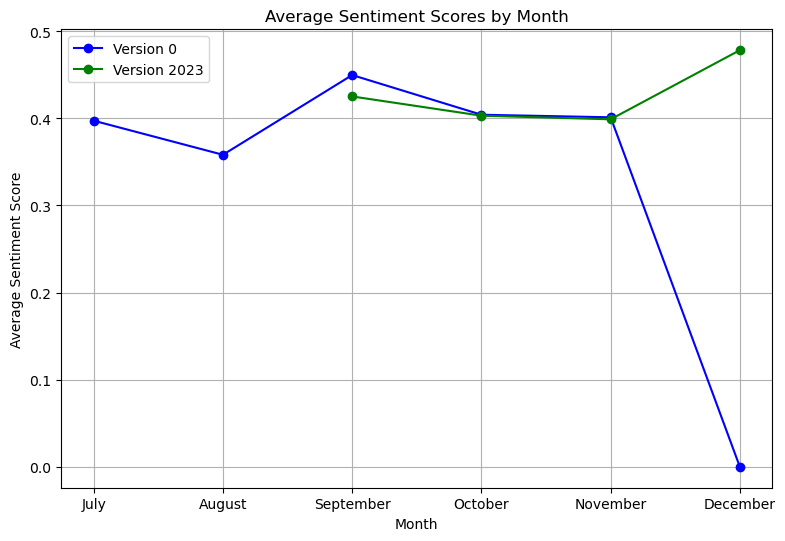

In [70]:

# Step 2: Get a random sample of 650 rows
random_sample_0 = data_01.sample(n=650, random_state=42)  # You can change the random_state
random_sample_2023 = data_2023.sample(n=650, random_state=42)  # You can change the random_state

# Convert 'Month' to a categorical type with the desired order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
random_sample_0['Month'] = pd.Categorical(random_sample_0['Month'], categories=month_order, ordered=True)
random_sample_2023['Month'] = pd.Categorical(random_sample_2023['Month'], categories=month_order, ordered=True)

# Step 3: Calculate the average sentiment score for each month
avg_sentiment_0_month = random_sample_0.groupby('Month')['sentiment_score'].mean().reset_index()
avg_sentiment_2023_month = random_sample_2023.groupby('Month')['sentiment_score'].mean().reset_index()

# Sort the DataFrames by the custom order
avg_sentiment_0_month = avg_sentiment_0_month.sort_values('Month')
avg_sentiment_2023_month = avg_sentiment_2023_month.sort_values('Month')

# Plotting the time series graph
plt.figure(figsize=(8, 6))

# Plot average sentiment score for each month in a single plot
plt.plot(avg_sentiment_0_month['Month'], avg_sentiment_0_month['sentiment_score'], marker='o', label='Version 0', color='blue')
plt.plot(avg_sentiment_2023_month['Month'], avg_sentiment_2023_month['sentiment_score'], marker='o', label='Version 2023', color='green')

# Set labels, legend, and grid
plt.title('Average Sentiment Scores by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


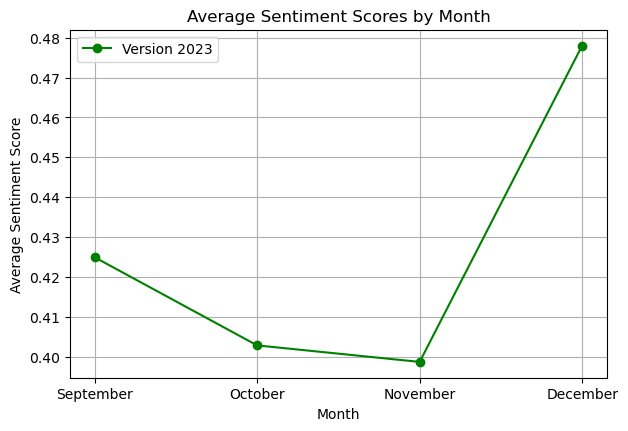

In [18]:
plt.plot(avg_sentiment_2023_month['Month'], avg_sentiment_2023_month['sentiment_score'], marker='o', label='Version 2023', color='green')

# Set labels, legend, and grid
plt.title('Average Sentiment Scores by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

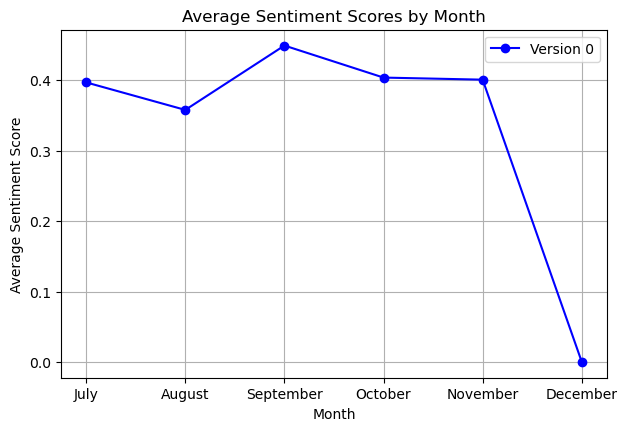

In [19]:
plt.plot(avg_sentiment_0_month['Month'], avg_sentiment_0_month['sentiment_score'], marker='o', label='Version 0', color='blue')
# Set labels, legend, and grid
plt.title('Average Sentiment Scores by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [20]:
# Convert 'Month' to numerical representation (month number)
month_to_number = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df_nov['Month_num'] = df_nov['Month'].map(month_to_number)

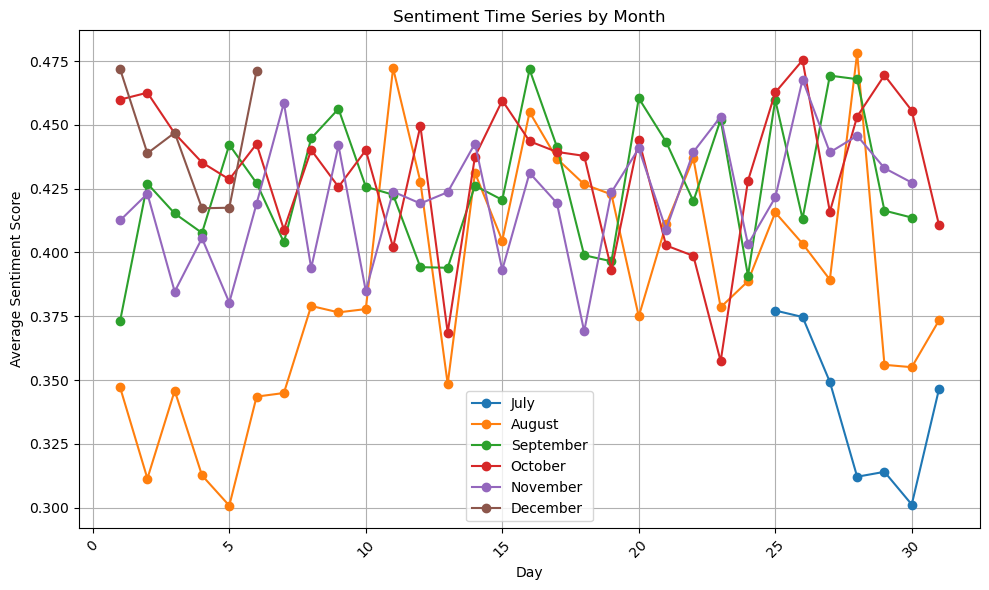

In [23]:
df_grouped_month_day_year_1 = df_nov.groupby(['Month_num', 'Day', 'Year'])['sentiment_score'].mean().reset_index()

# Group by month, day, and year and calculate the average sentiment score
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Plotting the time series graph
plt.figure(figsize=(10, 6))

# Plot individual lines for each month
for month in df_grouped_month_day_year_1['Month_num'].unique():
    month_data_1 = df_grouped_month_day_year_1[df_grouped_month_day_year_1['Month_num'] == month]
    plt.plot(month_data_1['Day'], month_data_1['sentiment_score'], marker='o', label=month_names[month])

plt.title('Sentiment Time Series by Month')
plt.xlabel('Day')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
avg_sentiment_2023_month.dropna(subset=['sentiment_score'], inplace=True)
avg_sentiment_2023_month.head()

,Month,sentiment_score
8,September,0.424935
9,October,0.402847
10,November,0.398710
11,December,0.478013


In [63]:
month_order = ['July', 'August', 'September', 'October', 'November', 'December']
avg_sentiment_2023_month['month_ord'] = pd.Categorical(avg_sentiment_2023_month['Month'], categories=month_order, ordered=True)

# Group by month and calculate the mean sentiment score
avg_sentiment_2023_month_mean = avg_sentiment_2023_month.groupby('month_ord')['sentiment_score'].mean().reset_index()

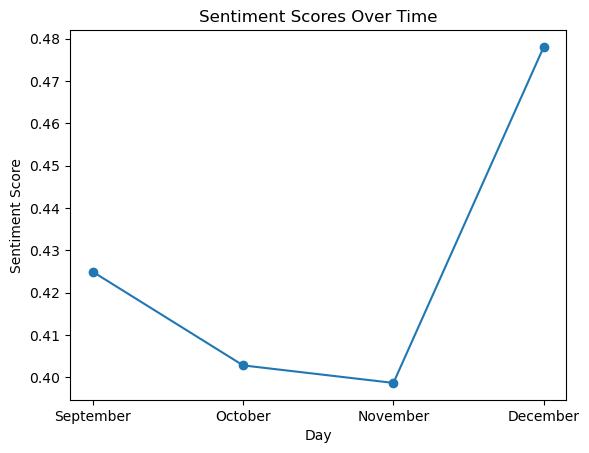

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming df is your DataFrame with columns 'day_of_week' and 'sentiment_score'
 # or avg_sentiment_2023_day, depending on the version

# Optionally, set 'day_of_week' as the index for time series data
# df.set_index('day_of_week', inplace=True)
plt.plot(avg_sentiment_2023_month_mean['month_ord'], avg_sentiment_2023_month_mean['sentiment_score'], marker='o')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Day')
plt.ylabel('Sentiment Score')
plt.show()

In [65]:
# Fit ARIMA model
model = ARIMA(avg_sentiment_2023_month_mean['sentiment_score'], order=(1, 0, 5))  # Replace p, d, q with appropriate values
results = model.fit()

# Generate predictions
predictions = results.predict(start=0, end=len(avg_sentiment_2023_month_mean) + 10)  # Adjust the prediction range as needed


t:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


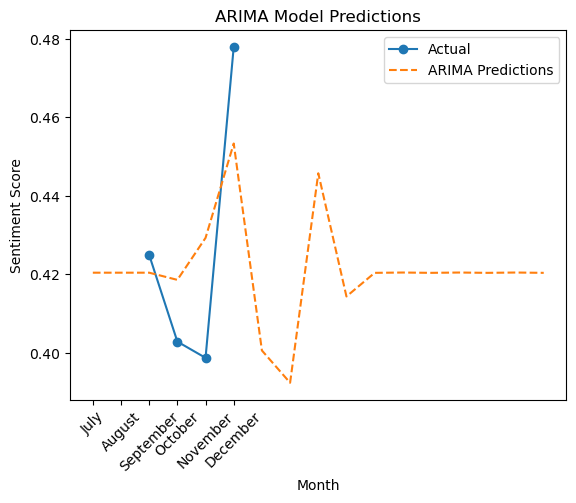

In [67]:
plt.plot(avg_sentiment_2023_month_mean['month_ord'], avg_sentiment_2023_month_mean['sentiment_score'], marker='o', label='Actual')
plt.plot(predictions.index, predictions, linestyle='dashed', label='ARIMA Predictions')
plt.title('ARIMA Model Predictions')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
# Customize x-axis ticks and labels for better visibility
plt.xticks(avg_sentiment_2023_month_mean['month_ord'])  # Set x-axis ticks to match the actual data points
plt.xticks(rotation=45) 
plt.legend()
plt.show()


In [78]:
avg_sentiment_0_month

,Month,sentiment_score,month_ord
6,July,0.397106,July
7,August,0.358018,August
8,September,0.449462,September
9,October,0.403951,October
10,November,0.401000,November
11,December,0.000000,NaN


In [72]:
# avg_sentiment_0_month.dropna(subset=['sentiment_score'], inplace=True)
# avg_sentiment_0_month.head()


,Month,sentiment_score
6,July,0.397106
7,August,0.358018
8,September,0.449462
9,October,0.403951
10,November,0.401000


In [79]:
month_order1 = ['July', 'August', 'September', 'October', 'November', 'December']
avg_sentiment_0_month['month_ord'] = pd.Categorical(avg_sentiment_0_month['Month'], categories=month_order1, ordered=True)

# Group by month and calculate the mean sentiment score
avg_sentiment_0_month_mean = avg_sentiment_0_month.groupby('month_ord')['sentiment_score'].mean().reset_index()

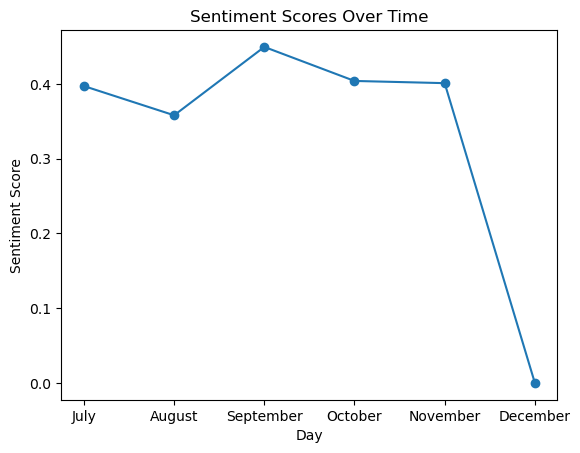

In [80]:


# Assuming df is your DataFrame with columns 'day_of_week' and 'sentiment_score'
 # or avg_sentiment_2023_day, depending on the version

# Optionally, set 'day_of_week' as the index for time series data
# df.set_index('day_of_week', inplace=True)
plt.plot(avg_sentiment_0_month_mean['month_ord'], avg_sentiment_0_month_mean['sentiment_score'], marker='o')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Day')
plt.ylabel('Sentiment Score')
plt.show()

In [81]:
# Fit ARIMA model
model = ARIMA(avg_sentiment_0_month_mean['sentiment_score'], order=(1, 0, 5))  # Replace p, d, q with appropriate values
results = model.fit()

# Generate predictions
predictions = results.predict(start=0, end=len(avg_sentiment_0_month_mean) + 10)  # Adjust the prediction range as needed


t:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
t:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


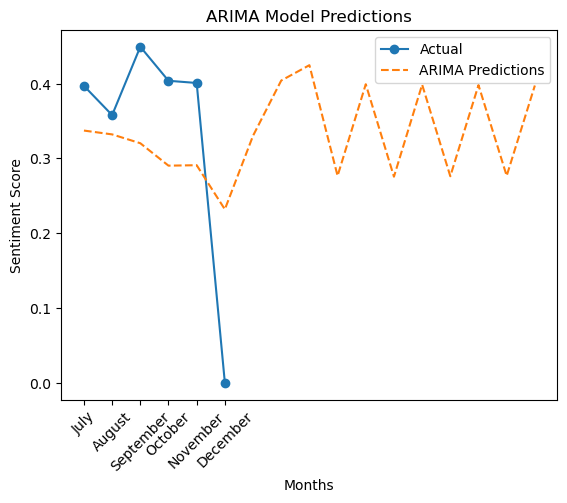

In [82]:
plt.plot(avg_sentiment_0_month_mean['month_ord'], avg_sentiment_0_month_mean['sentiment_score'], marker='o', label='Actual')
plt.plot(predictions.index, predictions, linestyle='dashed', label='ARIMA Predictions')
plt.title('ARIMA Model Predictions')
plt.xlabel('Months')
plt.ylabel('Sentiment Score')
plt.xticks(avg_sentiment_0_month_mean['month_ord'])  # Set x-axis ticks to match the actual data points
plt.xticks(rotation=45) 
plt.legend()
plt.show()


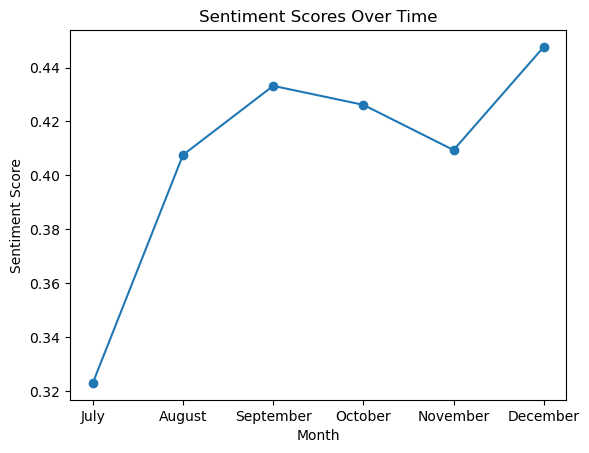

In [83]:
# calculating avg sentiment score based on random sampling
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

random_sample_month = df_nov.sample(n=1950, random_state=42)
random_sample_month['Month'] = pd.Categorical(random_sample_month['Month'], categories=month_order, ordered=True)
avg_sentiment_month = random_sample_month.groupby('Month')['sentiment_score'].mean().reset_index()

plt.plot(avg_sentiment_month['Month'], avg_sentiment_month['sentiment_score'], marker='o')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.show()
